# Credit card fraud detection

Feature selection approaches heavily inspired by https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection.

In [68]:
# Imports
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import PrecisionRecallDisplay

In [69]:
df = pd.read_csv("../data/creditcard.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [70]:
# Seperating features from labels
feat_df = df[[col for col in list(df.columns) if col != "Class"]]
label_df = df[["Class"]]

In [71]:
# Train validation test split. 80% train 10% validation 10% test
X_train, X_remaining, y_train, y_remaining = train_test_split(feat_df, label_df, test_size=.2, random_state=42, stratify=label_df)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=.5, random_state=42, stratify=y_remaining)
# TODO: switch to k-fold cross validation

In [72]:
# Check for constant features
from sklearn.feature_selection import VarianceThreshold

def check_constants(threshold):
    sel = VarianceThreshold(threshold=threshold)
    sel.fit(X_train)
    num_constant_features = len([x for x in X_train.columns if x not in X_train.columns[sel.get_support()]])
    print(f"{num_constant_features} features found")
    if num_constant_features > 0:
        print([x for x in X_train.columns if x not in X_train.columns[sel.get_support()]])

check_constants(0)

0 features found


In [73]:
# Check for quasi-constant features
check_constants(0.01)   # Variance of 0.01 indicates 99% of observations having the same value

0 features found


In [74]:
# SelectKBest Chi-Squared
# Is this failing because of negative values? https://www.quora.com/Why-cant-chi-squared-be-calculated-on-negative-values

# from sklearn.feature_selection import SelectKBest, chi2
# X_train_new = SelectKBest(chi2, k=2).fit_transform(X_train, y_train)
# X_train_new.shape

In [75]:
# SelectKBest f_classif (ANOVA f-value)
from sklearn.feature_selection import SelectKBest, f_classif
X_train_new = SelectKBest(f_classif, k=2).fit_transform(X_train, y_train)
X_train_new

/home/robbie/dev/aws-projects/fraud-detection/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-0.06655514, -0.76566983],
       [ 0.72106841, -0.27084236],
       [ 0.12274617, -0.72461599],
       ...,
       [ 0.16672664,  0.40479457],
       [ 1.79988196, -0.24797046],
       [-0.42050976,  0.51705177]], shape=(227845, 2))

In [92]:
# Correlation Matrix with heatmap
corr_matrix = X_train.corr()
corr_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.115662,-0.010436,-0.420856,-0.106422,0.173176,-0.063680,0.085216,-0.036247,-0.007365,...,-0.051021,0.044611,0.144018,0.050690,-0.016104,-0.233425,-0.042685,-0.003703,-0.010334,-0.010105
V1,0.115662,1.000000,0.003139,-0.000390,0.000357,-0.003419,-0.000742,-0.001194,0.003685,0.000660,...,0.002827,0.001177,0.000706,0.000609,0.000441,0.001263,0.000994,0.001654,0.006157,-0.227035
V2,-0.010436,0.003139,1.000000,0.002215,-0.001218,0.000604,0.000634,0.003261,-0.002569,-0.001701,...,-0.001293,0.000239,-0.000011,0.000549,0.002428,-0.000463,0.000960,-0.000879,0.005784,-0.530143
V3,-0.420856,-0.000390,0.002215,1.000000,0.000563,-0.002011,-0.001857,-0.004195,0.004347,-0.000578,...,0.003996,0.001844,-0.001957,0.000476,0.000214,0.001974,-0.000229,-0.001733,0.007445,-0.211310
V4,-0.106422,0.000357,-0.001218,0.000563,1.000000,-0.000317,0.002109,-0.000022,-0.000620,-0.001188,...,0.002468,-0.002265,0.001295,0.000665,0.001635,-0.001727,-0.000138,-0.001701,-0.005669,0.099970
V5,0.173176,-0.003419,0.000604,-0.002011,-0.000317,1.000000,-0.002342,-0.004907,0.001436,-0.000098,...,0.006006,0.004539,-0.002530,0.001662,-0.000529,-0.000880,0.000429,-0.004623,0.007610,-0.386767
V6,-0.063680,-0.000742,0.000634,-0.001857,0.002109,-0.002342,1.000000,0.001837,0.000090,0.000453,...,-0.001251,-0.000884,0.000389,-0.000017,-0.000781,-0.000142,0.000930,0.001961,-0.004543,0.217895
V7,0.085216,-0.001194,0.003261,-0.004195,-0.000022,-0.004907,0.001837,1.000000,0.004165,-0.001654,...,-0.004947,-0.000857,0.000867,-0.000675,0.000295,-0.000007,-0.002264,0.007551,-0.006017,0.398941
V8,-0.036247,0.003685,-0.002569,0.004347,-0.000620,0.001436,0.000090,0.004165,1.000000,-0.000156,...,0.001550,-0.000750,0.001958,-0.000148,-0.000888,-0.000168,-0.000419,-0.001561,0.002086,-0.102719
V9,-0.007365,0.000660,-0.001701,-0.000578,-0.001188,-0.000098,0.000453,-0.001654,-0.000156,1.000000,...,-0.001142,0.002930,0.000954,-0.001396,0.001351,-0.001270,-0.001298,-0.001873,0.001323,-0.043365


<Axes: >

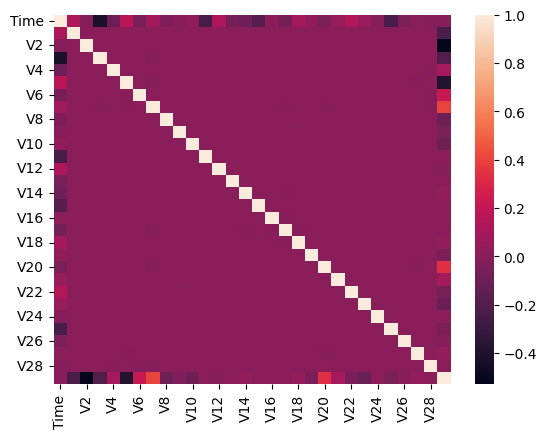

In [93]:
sns.heatmap(corr_matrix)

In [94]:
corr_matrix.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [78]:
bst = XGBClassifier(scale_pos_weight=577, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict_proba(X_test)[:,1]

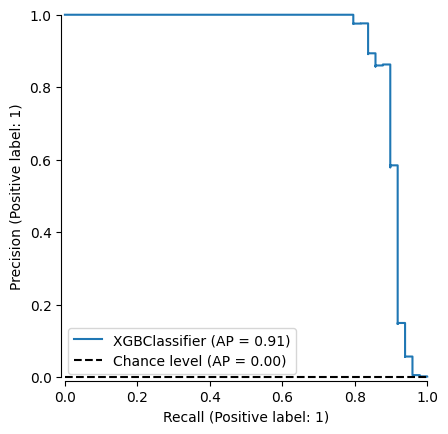

In [79]:
display = PrecisionRecallDisplay.from_predictions(y_test, preds, name="XGBClassifier", plot_chance_level=True, despine=True)

In [80]:
bst = XGBClassifier(scale_pos_weight=577, objective='binary:logistic', eval_metric="aucpr", max_depth=100)
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict_proba(X_test)[:,1]

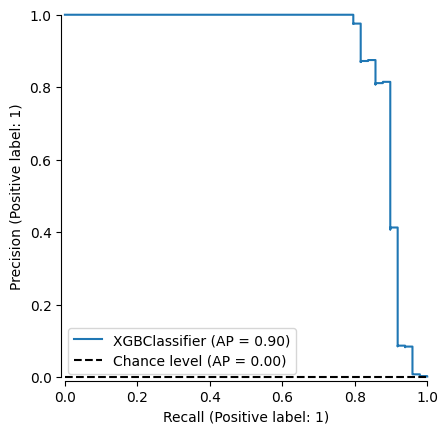

In [81]:
display = PrecisionRecallDisplay.from_predictions(y_test, preds, name="XGBClassifier", plot_chance_level=True, despine=True)

In [82]:
bst = XGBClassifier(objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict_proba(X_test)[:,1]

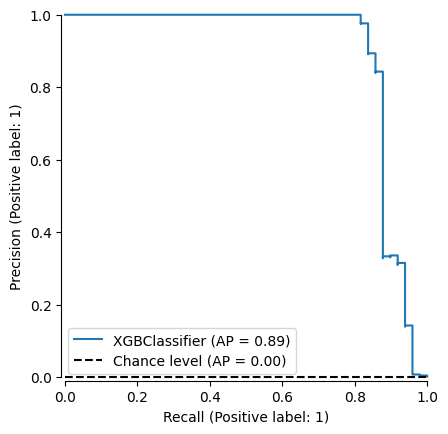

In [83]:
display = PrecisionRecallDisplay.from_predictions(y_test, preds, name="XGBClassifier", plot_chance_level=True, despine=True)